# CRIME INCIDENT REPORTS

#### By GROUP 3
*Contributors*
- Phuong Thao Ha (Katie)
- Thi Mai Chi Nguyen
- Shao-Wei Hung 
- Ningmeng He

# Introduction

As we know, keeping American public safe is the top priority for governments and all residents in the USA. Based on FBI crime data, Boston is not one of the safest communities in America. In 2017, Boston’s crime rate is 54% higher than the Massachusetts average. On top of that, looking at the violent crimes specifically, Boston has a violent crime rate that is 87% higher than the Massachusetts average and 75% higher than the national average.

In addition, gun control has always been a controversial debate in the US. Gun rights vs Gun control: which one is more reasonable? This triggers us to consult if there’s any method we can think of to reduce the violent offenses that related to gun use in Boston. The analysis is focus on telling a story about Boston's violent crimes from the year 2015 to date based on Boston public crime data.

Besides, we also build up a model to predict the shooting probability so that whenever Boston Polices encounter a lawbreaking event, they are well prepared to prevent more serious crimes that involved with gun use.

Reference: FBI's uniform crime reports for the year of 2017. Retrieved from https://www.areavibes.com/boston-ma/crime/

## Dataset

The data that is used in this project originally comes from the Boston Police Department (BPD) ( https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b ). The data consists of over 411,345 crime incidents in Boston from August 2015 to date.

## Project Definition

To achieve our goal, we will analyze and find the solution through following questions.

- What's the difference between the percentage of violence and non-violence in all the crime incidents?
- What's the percentage of gun shooting's involvement? 
- What's the difference between viloence incidents and all crime incidents by time period?

# 1. Data Extraction

In [2]:
from Group_3_Capstone_Project_Final import fill_nan, describe_col
from Group_3_Capstone_Project_Final import list_of_frequency, bar_chart
from Group_3_Capstone_Project_Final import calc_specificity, print_report, calc_prevalence

In [3]:
#import necessary libraries and data
import pandas as pd
import numpy as np
from sklearn import calibration
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
%matplotlib inline

In [4]:
# load the csv file from the url into a dataframe
data_url = 'https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b/download/tmprcwncq9s.csv'
master_df = pd.read_csv(data_url)

In [5]:
master_df.shape

(411345, 17)

The data set is a combination of 411,345 criminal cases divided by 17 columns related to the location, time, and type of crime happening.
In this dataset, we are naming the whole crime data as `master_df`, and the violent crime data only as `df`.

In [6]:
# looking at the 5 starting rows
master_df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192062384,3301,Verbal Disputes,VERBAL DISPUTE,B3,470,NaN,2019-08-09 20:46:00,2019,8,Friday,20,Part Three,ORLANDO ST,42.274251,-71.099389,"(42.27425136, -71.09938919)"
1,I192062383,3114,Investigate Property,INVESTIGATE PROPERTY,B3,446,NaN,2019-08-09 21:09:00,2019,8,Friday,21,Part Three,NORWELL ST,42.298284,-71.078694,"(42.29828416, -71.07869447)"
2,I192062380,2647,Other,THREATS TO DO BODILY HARM,C6,222,NaN,2019-08-09 19:40:00,2019,8,Friday,19,Part Two,E BROADWAY,42.335578,-71.038673,"(42.33557815, -71.03867318)"
3,I192062377,619,Larceny,LARCENY ALL OTHERS,B2,317,NaN,2019-07-25 10:00:00,2019,7,Thursday,10,Part One,RUTHVEN ST,42.312020,-71.088516,"(42.31202047, -71.08851632)"
4,I192062372,3207,Property Found,PROPERTY - FOUND,A1,77,NaN,2019-08-09 18:05:00,2019,8,Friday,18,Part Three,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"


In [7]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411345 entries, 0 to 411344
Data columns (total 17 columns):
INCIDENT_NUMBER        411345 non-null object
OFFENSE_CODE           411345 non-null int64
OFFENSE_CODE_GROUP     411345 non-null object
OFFENSE_DESCRIPTION    411345 non-null object
DISTRICT               409198 non-null object
REPORTING_AREA         411345 non-null object
SHOOTING               1690 non-null object
OCCURRED_ON_DATE       411345 non-null object
YEAR                   411345 non-null int64
MONTH                  411345 non-null int64
DAY_OF_WEEK            411345 non-null object
HOUR                   411345 non-null int64
UCR_PART               411237 non-null object
STREET                 399223 non-null object
Lat                    385060 non-null float64
Long                   385060 non-null float64
Location               411345 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 53.4+ MB


In [8]:
master_df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

The dataset has 17 columns which are shown above.

In [9]:
master_df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,411345.000000,411345.000000,411345.000000,411345.000000,385060.000000,385060.000000
mean,2328.250729,2017.021191,6.578441,13.114933,42.218514,-70.915344
std,1181.526957,1.252612,3.317504,6.294467,2.116437,3.423537
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1102.000000,2016.000000,4.000000,9.000000,42.297145,-71.097189
50%,3001.000000,2017.000000,7.000000,14.000000,42.325538,-71.077610
75%,3201.000000,2018.000000,9.000000,18.000000,42.348546,-71.062583
max,3831.000000,2019.000000,12.000000,23.000000,42.395042,-1.000000


# 2. Data Cleanup

In [10]:
for c in list(master_df.columns):
    
    # get a list of unique values
    n = master_df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

INCIDENT_NUMBER: 362186 unique values
OFFENSE_CODE: 222 unique values
OFFENSE_CODE_GROUP: 67 unique values
OFFENSE_DESCRIPTION: 244 unique values
DISTRICT
['B3' 'C6' 'B2' 'A1' 'E18' 'D14' nan 'A7' 'E13' 'A15' 'D4' 'C11' 'E5']
REPORTING_AREA: 880 unique values
SHOOTING
[nan 'Y']
OCCURRED_ON_DATE: 298502 unique values
YEAR
[2019 2015 2018 2017 2016]
MONTH
[ 8  7  2  6  5  4  3  9  1 11 12 10]
DAY_OF_WEEK
['Friday' 'Thursday' 'Wednesday' 'Tuesday' 'Monday' 'Saturday' 'Sunday']
HOUR
[20 21 19 10 18 13 17  0 11 16 12 15 22 14  8  3  9  7  6  5  4  2  1 23]
UCR_PART
['Part Three' 'Part Two' 'Part One' 'Other' nan]
STREET: 4855 unique values
Lat: 18808 unique values
Long: 18810 unique values
Location: 18826 unique values


From this we can see there are a lots of categorical (non-numeric) variables. There are also numerical categorical variables, and chronological data.
    - INCIDENT NUMBER is just identifiers an is not useful for our analysis
    - The dataset combines 222 "OFFENSE_CODE" divided by 67 "OFFENSE_CODE_GROUP"
    - "OFFENSE_CODE" column is an identifier with numerical categorical data
    - Our objective is analzing violent crimes, we will filter out data with codes that are involded with violent crimes from "OFFENSE_CODE_GROUP" column
    - "UCR_PART" means Uniform Crime Reporting ranking, "Part One" has the highest level of danger. UCR scores are ranked after the crime happened.

In [11]:
# drop the incident number column
master_df = master_df.drop('INCIDENT_NUMBER', 1)

In [12]:
master_df.isnull().sum()

OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 2147
REPORTING_AREA              0
SHOOTING               409655
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                  108
STREET                  12122
Lat                     26285
Long                    26285
Location                    0
dtype: int64

Missing values appeard in the columns correlated with location information such as "DISTRICT", "STREET", "Lat", "Long", and "UCR_PART". There are lots of missing data from the SHOOTING column, because cases without shooting record would be left blank as NaN. Now we are tranforming the columns to better read and analyze the data.

In [13]:
# examine the shooting variable
master_df.SHOOTING.unique()

array([nan, 'Y'], dtype=object)

In [14]:
# replace NaN in shooting to 'N' by fill_nan function
master_df['SHOOTING'] = fill_nan(master_df['SHOOTING'],'N')
# fill in other missing value by fill_nan function
master_df['DISTRICT'] = fill_nan(master_df['DISTRICT'],'UNK')
master_df['UCR_PART'] = fill_nan(master_df['UCR_PART'],'UNK')

In [15]:
# change the chronological data format
master_df['OCCURRED_ON_DATE'] = pd.to_datetime(master_df['OCCURRED_ON_DATE'])

In [16]:
# investigate code groups variables
master_df.groupby('OFFENSE_CODE_GROUP').size().sort_values(ascending=True)

OFFENSE_CODE_GROUP
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        3
Burglary - No Property Taken                     5
INVESTIGATE PERSON                               5
HUMAN TRAFFICKING                                8
Gambling                                         8
Manslaughter                                    10
Explosives                                      33
Phone Call Complaints                           44
Aircraft                                        58
HOME INVASION                                   92
Bomb Hoax                                      108
Arson                                          109
Criminal Harassment                            156
Prostitution                                   264
Homicide                                       270
Harbor Related Incidents                       297
Prisoner Related Incidents                     336
Service                                        370
Embezzlement

There are 67 offense code groups given by the dataset. As shown above, Motor Vehicle Accident has the highest cases as more than 47,000 are reported. Follow is Larceny (personal property theft) with more than 33,000 cases.
"Biological Threat" is the least concern in Boston with only 2 cases appeared.

Since the topic is about violent crimes, we are skipping the offense groups that not involed with any types of violence. Filtered out the master data, we save the violent data as `df` as our main dataset.

In [17]:
# create a list of vilolence crimes for the analysis
violence_crimes = ['HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE',
                   'Manslaughter','HOME INVASION','Bomb Hoax',
                   'Arson','Criminal Harassment','Homicide',
                   'Offenses Against Child / Family',
                   'Assembly or Gathering Violations',
                   'Ballistics','Firearm Violations','Harassment',
                   'Robbery','Aggravated Assault',
                   'Simple Assault']
# make a new column on violence crimes
master_df['VIOLENCE_GROUP'] = master_df['OFFENSE_CODE_GROUP'].copy()

# replace the offense code group column with violence code groups
master_df.loc[~master_df.VIOLENCE_GROUP.isin(violence_crimes),
       'VIOLENCE_GROUP'] = 'Other'

In [18]:
# drop the data which is not related to violence crime
df = master_df.copy()
df = master_df.drop(master_df[master_df['VIOLENCE_GROUP']=='Other'].index)

In [19]:
df.head(100)

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,VIOLENCE_GROUP
9,802,Simple Assault,ASSAULT SIMPLE - BATTERY,B2,318,N,2019-08-09 13:00:00,2019,8,Friday,13,Part Two,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)",Simple Assault
14,361,Robbery,ROBBERY - OTHER,B3,406,N,2019-08-09 19:05:00,2019,8,Friday,19,Part One,RIVER ST,42.271302,-71.074424,"(42.27130225, -71.07442362)",Robbery
19,301,Robbery,ROBBERY - STREET,UNK,,N,2019-08-09 19:06:00,2019,8,Friday,19,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)",Robbery
23,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D4,270,N,2019-08-09 18:52:00,2019,8,Friday,18,Part Two,HARRISON AVE,42.334018,-71.076381,"(42.33401829, -71.07638124)",Simple Assault
33,2629,Harassment,HARASSMENT,C11,347,N,2019-08-09 16:50:00,2019,8,Friday,16,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",Harassment
64,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",UNK,,N,2019-08-09 17:07:00,2019,8,Friday,17,Part Two,MASON ST,NaN,NaN,"(0.00000000, 0.00000000)",Firearm Violations
77,2629,Harassment,HARASSMENT,D14,787,N,2019-08-08 17:14:00,2019,8,Thursday,17,Part Two,KILSYTH RD,NaN,NaN,"(0.00000000, 0.00000000)",Harassment
80,1501,Firearm Violations,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",C11,340,N,2019-08-09 16:07:00,2019,8,Friday,16,Part Two,ADAMS ST,42.307156,-71.062455,"(42.30715639, -71.06245539)",Firearm Violations
99,301,Robbery,ROBBERY - STREET,E5,550,N,2019-08-09 14:43:00,2019,8,Friday,14,Part One,WASHINGTON ST,42.275818,-71.139913,"(42.27581799, -71.13991259)",Robbery
120,2629,Harassment,HARASSMENT,A1,70,N,2019-08-09 12:14:00,2019,8,Friday,12,Part Two,CHARLES ST,42.356455,-71.069570,"(42.35645514, -71.06956975)",Harassment


Here are the top 100 rows of new organized dataset after data cleaing.

# 3. Descriptive Statistics



Since we are analyzing data about violent crime, we should analyze it through descriptive statistics. To describe and summarize the data in ways that are meaningful and useful.

In [20]:
# Describe offense code groups
describe_col(df['OFFENSE_CODE_GROUP'])

count              47854
unique                15
top       Simple Assault
freq               20520
Name: OFFENSE_CODE_GROUP, dtype: object

The table shown above, there are 47,854 data in violence group and 15 different "CODE_GROUP" are involved. "Simple Assault" has the highest number which is 20,520 in this variable.

In [21]:
df.groupby('VIOLENCE_GROUP').size().sort_values(ascending=True)

VIOLENCE_GROUP
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        3
Manslaughter                                    10
HOME INVASION                                   92
Bomb Hoax                                      108
Arson                                          109
Criminal Harassment                            156
Homicide                                       270
Offenses Against Child / Family                659
Assembly or Gathering Violations              1121
Ballistics                                    1269
Firearm Violations                            2378
Harassment                                    5303
Robbery                                       5627
Aggravated Assault                           10229
Simple Assault                               20520
dtype: int64

The groups shown above are violence related crimes that we have picked up, Assaulting (attacking others) is the kind of crime that happening the most in Boston. Seems like this is the most dangerous crime among other violent crimes.

"HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE" appeared only 3 times over the course of 5 years, has the least concern.

In [22]:
# Describe offense description
describe_col(df['OFFENSE_DESCRIPTION'])

count                        47854
unique                          52
top       ASSAULT SIMPLE - BATTERY
freq                         19120
Name: OFFENSE_DESCRIPTION, dtype: object

There are 52 different groups in "OFFENSE_DESCRIPTION" variable, and "ASSAULT SIMPLE - BATTERY" has the highest number which is 19120.

In [23]:
# Describe districts
describe_col(df['DISTRICT'])

count     47854
unique       13
top          B2
freq       9240
Name: DISTRICT, dtype: object

In "districts" variable, there are 47,854 data and 13 different groups are involved. The highest one is "B2" which is 9,240. B2 area in boston indicates Roxbury which means there are having more violent incidents in Roxbury. 

In [24]:
df['DISTRICT'].unique()

array(['B2', 'B3', 'UNK', 'D4', 'C11', 'D14', 'E5', 'A1', 'E13', 'E18',
       'A7', 'C6', 'A15'], dtype=object)

13 differnt districts represt:

- B2: Roxbury
- B3: Mattapan/ North Dorchester
- UNK: unkown
- D4: Bay/ South End/ Fenway
- C11: Dorchester
- D14: Brighton/ Allston
- E5: West Roxbury/ Roslindale
- A1: Downtown
- E13: Jamaica Plain
- E18: Suffolk County, MA
- A7: East Boston
- C6: South Boston
- A15: Charlestown

In [25]:
# Describe shooting case
df.groupby('SHOOTING').size()

SHOOTING
N    46585
Y     1269
dtype: int64

In our violent group analysis, there are 1,269 incidents involve gun shooting and 46,585 are not.

In [26]:
# Describe ucr_part
df.groupby('UCR_PART').size().sort_values(ascending=True)

UCR_PART
UNK              95
Other           119
Part Three     1121
Part One      16126
Part Two      30393
dtype: int64

Based on Uniform Crime Reporting (UCR) system, there are 30,393 violent incidents in part two, which is the highest number. 

- Part I offenses: Forcible rape, Robbery, Aggravated assault, Burglary, Larceny-theft, Motor vehicle theft, Arson, etc.

- Part II offenses: Other assaults (simple), Forgery and counterfeiting,Fraud, Embezzlement, Stolen property, Vandalism, Weapon, Prostitution and commercialized vice, Sex offenses (except forcible rape, prostitution, and commercialized vice), Drug abuse violation, etc.)


In [27]:
# Describe street
describe_col(df['STREET'])

count             46506
unique             2738
top       WASHINGTON ST
freq               2132
Name: STREET, dtype: object

The table shown above, washington street has the highest number of violent incidents. However, in Greater Boston Area, there are more than one street named wahsington street.

# 4. Visualization

After finishing data exploration and data cleaning, we assume the reason of high numbers of violent incidents is because of the gun shooting rate. Therefore, we should find out different rate between shooting rate in violence groups and shooting rate in nonviolence groups.

### Shooting Case Analysis

In [28]:
# Based on Violence group
shoot_true = len(df.loc[df['SHOOTING'] == 'Y'])
shoot_false = len(df.loc[df['SHOOTING'] == 'N'])
print('With shooting(num): ' + str(shoot_true))
print('With shooting(%):   ' + str(round(shoot_true*100/len(df),2))+'%')
print()
print('Without shooting(num): ' + str(shoot_false))
print('Without shooting(%):   ' + str(round(shoot_false*100/len(df),2))+'%')

With shooting(num): 1269
With shooting(%):   2.65%

Without shooting(num): 46585
Without shooting(%):   97.35%


In [29]:
Vshooting_no = sum(df['SHOOTING']=='Y')
Vnonshooting_no = sum(df['SHOOTING']=='N')
NonVshooting_no = sum(master_df['SHOOTING']=='Y') - Vshooting_no

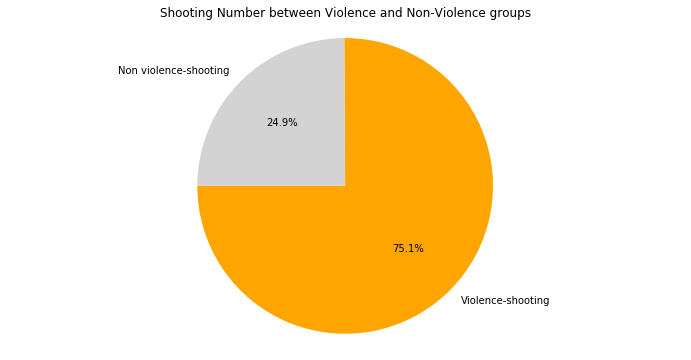

In [30]:
# Compare shooting in the violence group and Non violence group
labels = 'Violence-shooting', 'Non violence-shooting'

sizes = [Vshooting_no, NonVshooting_no]
colors = ['orange','lightgrey']

# Plot
plt.figure(figsize=(12,6))
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=180)

plt.axis('equal')
plt.title('Shooting Number between Violence and Non-Violence groups')
plt.show()

According to the pie chart shown above, gun shootings are involved in most of the violent crimes. Thus, we decide to analyze the violent groups more based on different time intervals. Then find out if there is any possible solution, we can figure out to solve the problem.

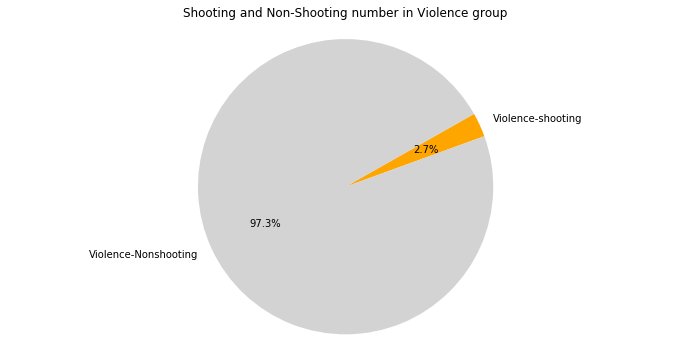

In [31]:
# Compare shooting in the violence group and Non violence group
labels = 'Violence-shooting', 'Violence-Nonshooting'

sizes = [Vshooting_no,Vnonshooting_no]
colors = ['orange','lightgrey']

# Plot
plt.figure(figsize=(12,6))
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=20)
plt.title('Shooting and Non-Shooting number in Violence group')
plt.axis('equal')
plt.show()

However, we see the graph shown above that most of the violence incidents do not involve in gun shooting. We can assume that gun shooting doesn't have high correlation with the violent crime rate.

#### Number of Violent crimes over 5 years

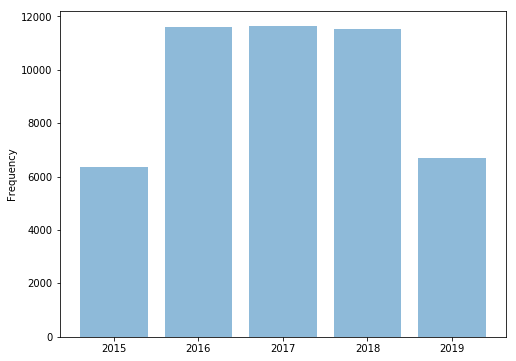

In [32]:
# Violence group based on year 
list_unique_year, list_number_year = list_of_frequency('YEAR',list(range(2015,2020)), df)
bar_chart(list_number_year,list_unique_year)

Accoring to the graphs based on time interval (yearly) shown above, violent crime rate experiences rising tendency from 2015 to 2018. It will not accurate enough to predict the exact violent crime rate of 2019 since it is not over yet. Then we can analyze more detailed by looking at monthly interval.

#### Number of Violent crimes per districts

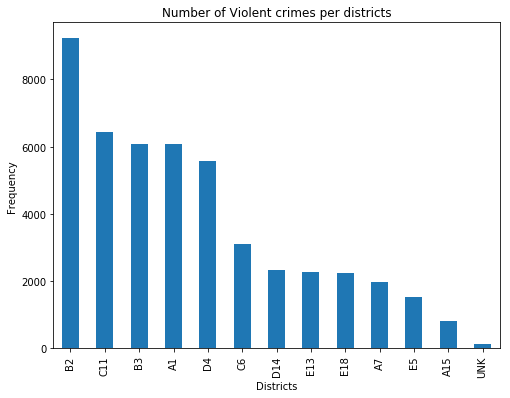

In [33]:
# show the districts related with highest to lowest crime events
plt.figure(figsize=(8,6))
df['DISTRICT'].value_counts().plot.bar()
plt.title('Number of Violent crimes per districts')
plt.xlabel('Districts')
plt.ylabel('Frequency')
plt.show()

According to the graph shown above, B2 district which is Roxbury has the highest number of violent incidents. In addition, Dorchester and Downtown also have high rates of violent incidents. To reduce the violent incidents, we suggest that BDP should assign more polices in these area, especially in Roxbury.

#### Number of Violent crimes over 12 months

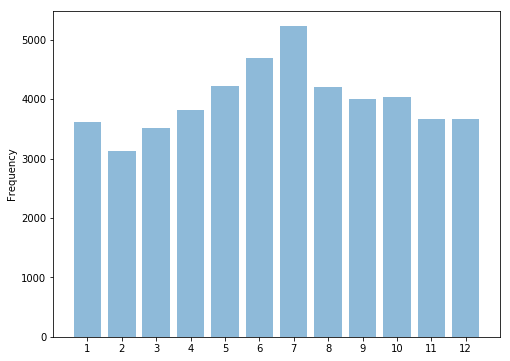

In [34]:
# the total number of violence group over the course of a year 
list_unique_month, list_number_month = list_of_frequency('MONTH',list(range(1,13)), df)
bar_chart(list_number_month,list_unique_month)

According to the data to date, there is higher crime rate during the summer, reaching its peak on July. One possible reason could be the increasing of tourism during summer holidays in Boston. In order to achieve our goal on reducing the violent rate, we suggest that BDP should assign more polices during summer time. 

#### Number of Violent crimes per weekdays

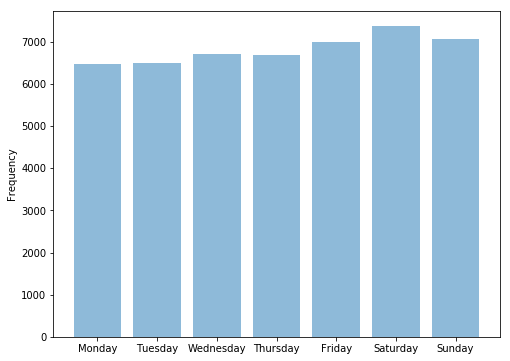

In [35]:
# Total number violence group crime for each day of week
day_of_week = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
list_unique_day, list_number_day = list_of_frequency('DAY_OF_WEEK',day_of_week, df)

# plot the bar chart
bar_chart(list_number_day,list_unique_day)

According to the graph shown above, Saturday shows slightly higher violent crime rate than the other six days in a week. One possible reason could be that there are more tourists in Boston on Saturday. In addition, since there is no significant difference in each day, BDP should maintain their duties.

#### Number of Violent crimes per hours

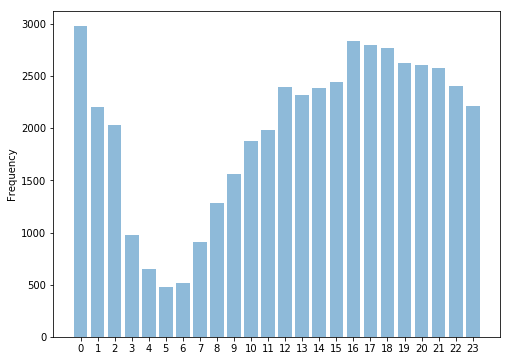

In [36]:
# Based on hours
list_unique_hour, list_number_hour = list_of_frequency('HOUR',list(range(0,24)), df)

# Plot the bar chart
bar_chart(list_number_hour,list_unique_hour)

According to the graph shown above, the violent crime rate does not show obvious difference except the time before the dawn to early morning which is 3am to 9am. Therefore, it is possible that violent crimes happen by chance. In addition, the peak is at 12am. One possible reason could be that criminals can escape more easily since it is dark out. we suggest that BDP should assign more police(especially the equipped ones) during this time interval to ensure that violent incidents won’t threaten the safety of the neighborhood and polices.

# 5. Predictive Analytics

Since there’s limited solution to reduce violent rate, we can only assign more police in certain time range. Therefore, we can also build up a prediction model to predict if there is gun shooting involved when crime incidents happen, thus to lower the rate of unknown gun shooting incidents and to avoid more extended violent incidents.

## 5.1 Create features for predictive models

In [37]:
# examine the missing value in the dataset, since some machine 
# learning models can't handle missing data, we may drop it off
df.isnull().sum()

OFFENSE_CODE              0
OFFENSE_CODE_GROUP        0
OFFENSE_DESCRIPTION       0
DISTRICT                  0
REPORTING_AREA            0
SHOOTING                  0
OCCURRED_ON_DATE          0
YEAR                      0
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
UCR_PART                  0
STREET                 1348
Lat                    2800
Long                   2800
Location                  0
VIOLENCE_GROUP            0
dtype: int64

In [38]:
# drop missing data
df = df.dropna()
len(df)

44825

In [39]:
# create an output label
df['OUTPUT_LABEL'] = (df.SHOOTING == 'Y').astype('int')
df.head()

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,VIOLENCE_GROUP,OUTPUT_LABEL
9,802,Simple Assault,ASSAULT SIMPLE - BATTERY,B2,318,N,2019-08-09 13:00:00,2019,8,Friday,13,Part Two,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)",Simple Assault,0
14,361,Robbery,ROBBERY - OTHER,B3,406,N,2019-08-09 19:05:00,2019,8,Friday,19,Part One,RIVER ST,42.271302,-71.074424,"(42.27130225, -71.07442362)",Robbery,0
23,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D4,270,N,2019-08-09 18:52:00,2019,8,Friday,18,Part Two,HARRISON AVE,42.334018,-71.076381,"(42.33401829, -71.07638124)",Simple Assault,0
33,2629,Harassment,HARASSMENT,C11,347,N,2019-08-09 16:50:00,2019,8,Friday,16,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",Harassment,0
80,1501,Firearm Violations,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",C11,340,N,2019-08-09 16:07:00,2019,8,Friday,16,Part Two,ADAMS ST,42.307156,-71.062455,"(42.30715639, -71.06245539)",Firearm Violations,0


In [40]:
print('prevalence of the positive (shooting) class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive (shooting) class: 0.027


In [41]:
# create a set of categorical variables in the dataset
cat_cols = ['OFFENSE_CODE_GROUP','DISTRICT','REPORTING_AREA',
            'DAY_OF_WEEK']

`District`,`UCR_Part` are categorical variables and have missing data. Therefore, we add an categorical type for unknown using fillna function

Hot coding the categorical variables in the crime dataset. 

In [42]:
pd.get_dummies(df[cat_cols],drop_first = True).head()

,OFFENSE_CODE_GROUP_Arson,OFFENSE_CODE_GROUP_Assembly or Gathering Violations,OFFENSE_CODE_GROUP_Ballistics,OFFENSE_CODE_GROUP_Bomb Hoax,OFFENSE_CODE_GROUP_Criminal Harassment,OFFENSE_CODE_GROUP_Firearm Violations,OFFENSE_CODE_GROUP_HOME INVASION,OFFENSE_CODE_GROUP_HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,OFFENSE_CODE_GROUP_Harassment,OFFENSE_CODE_GROUP_Homicide,...,REPORTING_AREA_962,REPORTING_AREA_97,REPORTING_AREA_98,REPORTING_AREA_99,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
80,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
cat_num_cols = ['OFFENSE_CODE','HOUR','YEAR','MONTH']
df[cat_num_cols] = df[cat_num_cols].astype('str')
pd.get_dummies(df[cat_num_cols],drop_first = True).head()

,OFFENSE_CODE_112,OFFENSE_CODE_121,OFFENSE_CODE_123,OFFENSE_CODE_1501,OFFENSE_CODE_1502,OFFENSE_CODE_1503,OFFENSE_CODE_1510,OFFENSE_CODE_1620,OFFENSE_CODE_2003,OFFENSE_CODE_2004,...,MONTH_11,MONTH_12,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
80,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
df_cat = pd.get_dummies(df[cat_cols + cat_num_cols],drop_first = True)

In [45]:
df_cat.head()

,OFFENSE_CODE_GROUP_Arson,OFFENSE_CODE_GROUP_Assembly or Gathering Violations,OFFENSE_CODE_GROUP_Ballistics,OFFENSE_CODE_GROUP_Bomb Hoax,OFFENSE_CODE_GROUP_Criminal Harassment,OFFENSE_CODE_GROUP_Firearm Violations,OFFENSE_CODE_GROUP_HOME INVASION,OFFENSE_CODE_GROUP_HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,OFFENSE_CODE_GROUP_Harassment,OFFENSE_CODE_GROUP_Homicide,...,MONTH_11,MONTH_12,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
80,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
df = pd.concat([df,df_cat],axis = 1)

In [47]:
# save the column names of the categorical data
cat_cols_all = list(df_cat.columns)

In [48]:
# features summary
print('Numerical Features:',0)
print('Categorical Features:',len(cat_cols_all))

Numerical Features: 0
Categorical Features: 980


In [49]:
df[cat_cols_all].isnull().sum().sort_values(ascending = False).head(10)

MONTH_9               0
REPORTING_AREA_381    0
REPORTING_AREA_38     0
REPORTING_AREA_379    0
REPORTING_AREA_378    0
REPORTING_AREA_377    0
REPORTING_AREA_376    0
REPORTING_AREA_375    0
REPORTING_AREA_374    0
REPORTING_AREA_373    0
dtype: int64

In [50]:
# make a new dataframe
df_data = df[cat_cols_all + ['OUTPUT_LABEL']]

In [51]:
# Check for duplicate columns in cat_cols_all
dup_cols = set([x for x in cat_cols_all if cat_cols_all.count(x)>1])
print(dup_cols)
assert len(dup_cols) == 0,'you have duplicated columns in cols_input'

set()


In [52]:
# check for duplicate columns in df_data
cols_df_data = list(df_data.columns)
dup_cols = set([x for x in cols_df_data if cols_df_data.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0,'you have duplicated columns in df_data'

set()


In [53]:
# check the size of df_data makes sense
assert (len(cat_cols_all) + 1) == len(df_data.columns), 'issue with dimensions of df_data or cols_input'

## 5.2 Building Models

In [54]:
# split the dataset into 70% train, 15% validation, 15% test
# shuffle the sample
df_data = df_data.sample(n = len(df_data))
df_data = df_data.reset_index(drop=True)

In [55]:
# hold 30% of the data for validation and testing set
df_30 = df_data.sample(frac=0.30)
print('Split size: %.3f'%(len(df_30)/len(df_data)))

Split size: 0.300


In [56]:
# splitting above data to validation and test data
df_test = df_30.sample(frac=0.5)
df_valid = df_30.drop(df_test.index)

In [57]:
# use the remaining 70% of dataset as training set
df_train_all = df_data.drop(df_30.index)

In [58]:
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 6724):0.028
Valid prevalence(n = 6724):0.029
Train all prevalence(n = 31377):0.027


In [59]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 44825)


In our situation, there is only 2.7% of shooting happened among violence cases, indicates that we have an imbalance dataset in which there are more negatives than positives. Therefore, we are using the sub-sample approach to create a balance data set that has 50% positive and 50% negative results. 

In [60]:
# split the training data into positive and negative
row_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[row_pos]
df_train_neg = df_train_all.loc[~row_pos]

# merge the balance data
n = np.min([len(df_train_pos), len(df_train_neg)])

df_train = pd.concat([df_train_pos.sample(n = n, random_state = 42), 
                      df_train_neg.sample(n = n, random_state = 42)],axis = 0, 
                     ignore_index = True)

# shuffle the order of training samples
df_train = df_train.sample(n = len(df_train)).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 1690):0.500


In [61]:
# save the cat_cols_all with a package called pickle
pickle.dump(cat_cols_all, open('cat_cols_all.sav', 'wb'))

Create input matrix x and output vector y for machine learning model

In [62]:
X_train = df_train[cat_cols_all].values
X_train_all = df_train_all[cat_cols_all].values
X_valid = df_valid[cat_cols_all].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (31377, 980)
Training shapes: (1690, 980) (1690,)
Validation shapes: (6724, 980) (6724,)


In [63]:
# scale the data of different size
scaler  = StandardScaler()
scaler.fit(X_train_all)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
# save the scaler for the test data
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [65]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [66]:
# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [67]:
# set up the threshold
thresh = 0.5

In [68]:
# k-nearest neighbors
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

In [69]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.935
accuracy:0.776
recall:0.987
precision:0.694
specificity:0.464
prevalence:0.500
 
Validation:
AUC:0.918
accuracy:0.539
recall:1.000
precision:0.059
specificity:0.426
prevalence:0.029
 


Our first model did pretty well. We have an AUC of 0.93 when we use a threshold of 0.5

In [70]:
# logistic regression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.994
accuracy:0.963
recall:0.973
precision:0.954
specificity:0.953
prevalence:0.500
 
Validation:
AUC:0.914
accuracy:0.765
recall:0.953
precision:0.105
specificity:0.760
prevalence:0.029
 


Logistic regression does even a better job with the accuracy of 95% and the precision of 94%. Training set and validation set don't seem to have a wide differences, indicating that the model is robust enough to predict the probability of shooting among violence crimes.

# Conclusion


According to our analysis based on differnt time intervals and locations, we suggest that BDP can assign more polices in specific time and area. In addtion, to protect the neiborhood and polices, BDP can use our model to test if there is gun shooting involved the crime incidents and equipped well before they start off missions.